# Parameter estimation

This notebook shows how to use the Dottermodel to estimate the friction parameter in a stream. 

First, we import the dotter model

In [1]:
%matplotlib notebook
from dotter import dotter
from dotter import notebook
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython import display


Next, we build the model from config

In [2]:
stream = dotter.build_model_from_config('../cases/example_03/config.ini')
measurements = np.loadtxt('../cases/example_03/measurements.csv', skiprows=1, delimiter=',')

Initialising geometry...
Loading lateral sources...
Generating computational grid...
Planting vegetation...
Loading events...
Model loaded


<IPython.core.display.Javascript object>


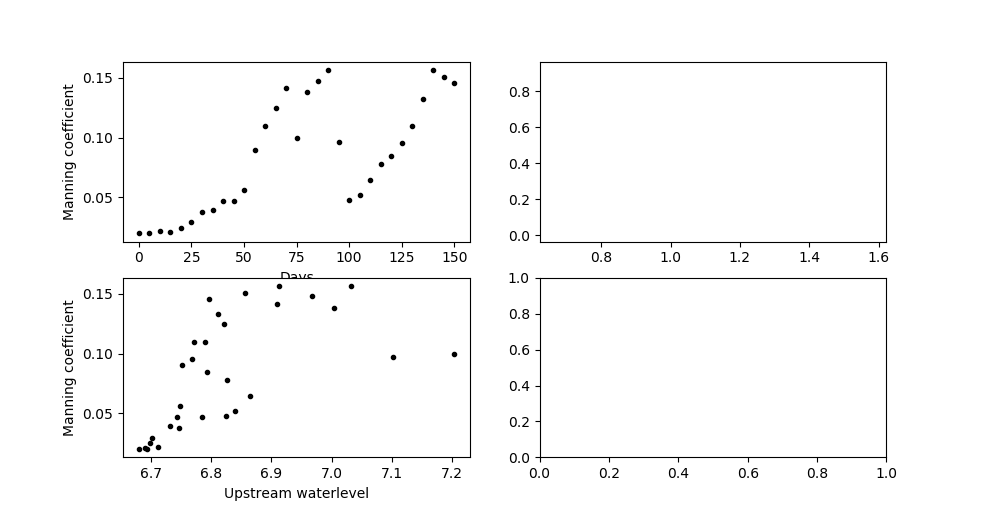

VBox(children=(HTML(value=''), IntProgress(value=0, max=153)))

In [3]:
Q = measurements.T[0]
h_up = measurements.T[1]
h_down = measurements.T[2]
t = list(range(len(Q)))

fig, axes = plt.subplots(2, 2, figsize=(10, 4))
axes[0][0].set_ylabel('Manning coefficient')
axes[0][0].set_xlabel('Days')
axes[1][0].set_xlabel('Upstream waterlevel')
axes[1][0].set_ylabel('Manning coefficient')
frictionvalues = []

mod_skip = 5
counter = range(len(t))
for q, hup, hdown, it, i in notebook.log_progress(zip(Q, h_down, h_up, t, counter), every=1, size=len(Q)):
    if np.mod(i, 5) == 0:
        stream.parameters['h'] = hdown - 5.13
        stream.parameters['Q'] = q
        stream.generate_grid()
        friction, res = dotter.estimate_roughness(stream, hup, 'waterlevel')
        frictionvalues.append(friction[0])
        axes[0][0].plot(it, friction, '.k')
        axes[1][0].plot(hup, friction, '.k')
        fig.canvas.draw()
        #display.clear_output(fig, wait=True)
        #display.display(fig)
#display.clear_output()
np.savetxt('frictionvalues.csv', frictionvalues, delimiter=',')

